The focus of this notebook is to find the overall returns and volatility of all companies in sp500 before clustering. Then, the same analysis will be performed on technology companies only. Finally, the time domain will focus on the COVID era.

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sp500_stocks.csv')

Volatility: dispersion of returns for a given security. Higher volatility = Riskier security

In [66]:
# for each stock calculate pct_change
from tqdm import tqdm
results = []
for symbol in tqdm(df['Symbol'].unique()):
    stock = df[df['Symbol'] == symbol]
    percent_change = stock['Adj Close'].pct_change()
    returns = np.mean(percent_change) * 252
    volatility = np.std(percent_change) * np.sqrt(252)
    results.append((symbol, returns, volatility))


# create a new dataframe with tuples
volatility_df = pd.DataFrame(results, columns=['Symbol', 'Returns', 'Volatility'])


100%|██████████| 503/503 [00:42<00:00, 11.83it/s]


In [67]:
volatility_df

,Symbol,Returns,Volatility
0,MMM,0.081958,0.225809
1,AOS,0.225792,0.274423
2,ABT,0.147356,0.215985
3,ABBV,0.216232,0.264045
4,ACN,0.191999,0.242756
...,...,...,...
498,XYL,0.182586,0.265069
499,YUM,0.166427,0.239358
500,ZBRA,0.228626,0.361711
501,ZBH,0.095470,0.258316


In [68]:
data = np.asarray([np.asarray(volatility_df['Returns']), np.asarray(volatility_df['Volatility'])]).T
dist = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)
    dist.append(kmeans.inertia_)


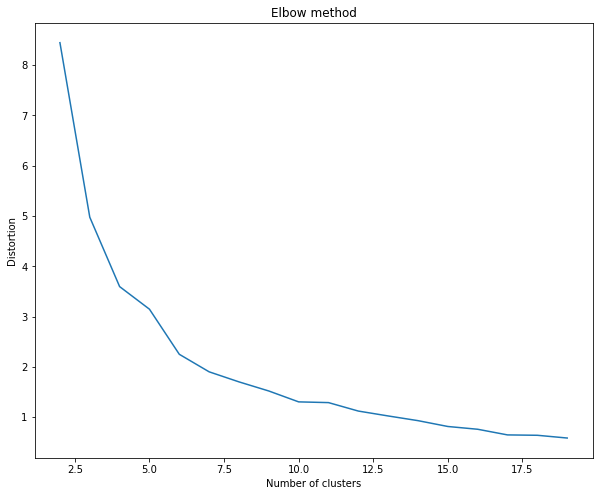

In [69]:
fig = plt.figure(figsize=(10, 8))
plt.plot(range(2, 20), dist)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Elbow occurs at 4

In [70]:
# choose 4 clusters and assign each sample to a cluster then create clusters_df

kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(data)
details = [(name, returns, volatility, cluster) for name, returns, volatility, cluster in zip(volatility_df['Symbol'], volatility_df['Returns'], volatility_df['Volatility'], kmeans.labels_)]
# include in the dataframe the cluster, symbol, returns and volatility
clusters_df = pd.DataFrame(details, columns=['Symbol', 'Returns', 'Volatility', 'Cluster'])
clusters_df

,Symbol,Returns,Volatility,Cluster
0,MMM,0.081958,0.225809,0
1,AOS,0.225792,0.274423,0
2,ABT,0.147356,0.215985,0
3,ABBV,0.216232,0.264045,0
4,ACN,0.191999,0.242756,0
...,...,...,...,...
498,XYL,0.182586,0.265069,0
499,YUM,0.166427,0.239358,0
500,ZBRA,0.228626,0.361711,3
501,ZBH,0.095470,0.258316,0


In [71]:
clusters_df['Cluster'].unique()

array([0, 3, 2, 1])

In [72]:
# plot clusters using plotly
import plotly.express as px
fig = px.scatter(clusters_df, x='Returns', y='Volatility', color=clusters_df.Cluster, color_continuous_scale=['red', 'green', 'blue', 'black'])
# limit x axis to 0.2
fig.update_xaxes(range=[-0.2, 1.2])
# fig.update(layout_coloraxis_showscale=True)
fig.show()



In [7]:
companies_df = pd.read_csv('sp500_companies.csv')

In [4]:
# filter semi conductor companies
companies_df = companies_df[companies_df['Industry'] == 'Semiconductors']

In [5]:
companies_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,880.08,2200200019968,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.045444
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1339.43,620720029696,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012821
27,NMS,AMD,"Advanced Micro Devices, Inc.","Advanced Micro Devices, Inc.",Technology,Semiconductors,170.42,275422576640,3.854000e+09,0.102,Santa Clara,CA,United States,26000.0,"Advanced Micro Devices, Inc. operates as a sem...",0.005689
40,NMS,QCOM,QUALCOMM Incorporated,QUALCOMM Incorporated,Technology,Semiconductors,171.53,191427477504,1.085300e+10,0.050,San Diego,CA,United States,50000.0,QUALCOMM Incorporated engages in the developme...,0.003954
49,NMS,INTC,Intel Corporation,Intel Corporation,Technology,Semiconductors,38.71,164783423488,9.633000e+09,0.097,Santa Clara,CA,United States,124800.0,"Intel Corporation designs, develops, manufactu...",0.003404
56,NMS,TXN,Texas Instruments Incorporated,Texas Instruments Incorporated,Technology,Semiconductors,167.50,152434376704,8.490000e+09,-0.127,Dallas,TX,United States,34000.0,"Texas Instruments Incorporated designs, manufa...",0.003148
65,NMS,MU,"Micron Technology, Inc.","Micron Technology, Inc.",Technology,Semiconductors,123.58,136848785408,3.663000e+09,0.577,Boise,ID,United States,43000.0,"Micron Technology, Inc. designs, develops, man...",0.002827
98,NMS,ADI,"Analog Devices, Inc.","Analog Devices, Inc.",Technology,Semiconductors,194.76,96583041024,5.681084e+09,-0.227,Wilmington,MA,United States,26000.0,"Analog Devices, Inc. designs, manufactures, te...",0.001995
150,NMS,NXPI,NXP Semiconductors N.V.,NXP Semiconductors N.V.,Technology,Semiconductors,241.01,61809184768,4.832000e+09,0.033,Eindhoven,NaN,Netherlands,34200.0,NXP Semiconductors N.V. offers various semicon...,0.001277
192,NMS,MCHP,Microchip Technology Incorporat,Microchip Technology Incorporated,Technology,Semiconductors,87.57,47321776128,4.076700e+09,-0.186,Chandler,AZ,United States,22600.0,"Microchip Technology Incorporated develops, ma...",0.000977


In [6]:
df[df['Symbol'].isin(companies_df['Symbol'])]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
21528,2010-01-04,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
21529,2010-01-05,AMD,9.710000,9.710000,9.900000,9.680000,9.710000,22145700.0
21530,2010-01-06,AMD,9.570000,9.570000,9.760000,9.550000,9.680000,18643400.0
21531,2010-01-07,AMD,9.470000,9.470000,9.550000,9.180000,9.510000,26806800.0
21532,2010-01-08,AMD,9.430000,9.430000,9.470000,9.290000,9.370000,13752800.0
...,...,...,...,...,...,...,...,...
1600243,2024-04-01,TXN,173.169998,173.169998,175.910004,172.860001,174.119995,2303200.0
1600244,2024-04-02,TXN,170.360001,170.360001,172.350006,169.600006,172.350006,3304500.0
1600245,2024-04-03,TXN,170.339996,170.339996,170.889999,167.889999,169.580002,3295800.0
1600246,2024-04-04,TXN,168.529999,168.529999,173.000000,168.100006,171.770004,7491300.0


In [7]:
# filter out date between 2020 and 2022
df_new = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2022-01-01')]
df_new = df_new[df_new['Symbol'].isin(companies_df['Symbol'])]

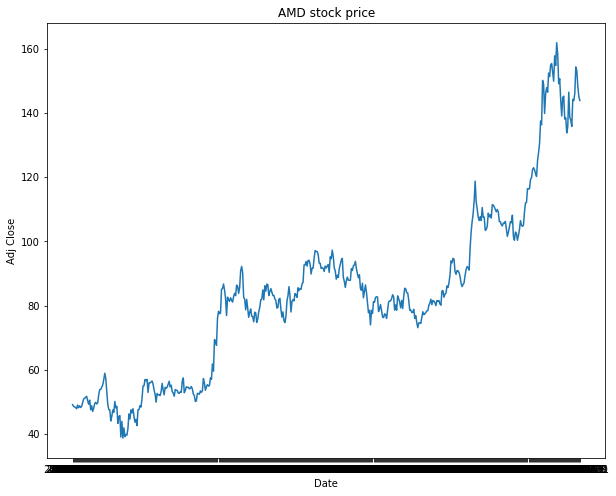

In [87]:
df_new[df_new['Symbol'] == 'AMD']

# plot date vs adj close for AMD
plt.figure(figsize=(10, 8))
plt.plot(df_new[df_new['Symbol'] == 'AMD']['Date'], df_new[df_new['Symbol'] == 'AMD']['Adj Close'])
plt.title('AMD stock price')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

In [4]:
all_companies_df = pd.read_csv('sp500Companies.csv')
all_companies_df['Industry'].unique()

array(['Software - Infrastructure', 'Consumer Electronics',
       'Semiconductors', 'Internet Retail',
       'Internet Content & Information', 'Insurance - Diversified',
       'Drug Manufacturers - General', 'Credit Services',
       'Banks - Diversified', 'Auto Manufacturers', 'Discount Stores',
       'Oil & Gas Integrated', 'Healthcare Plans',
       'Household & Personal Products', 'Home Improvement Retail',
       'Software - Application', 'Entertainment',
       'Beverages - Non-Alcoholic', 'Specialty Chemicals',
       'Diagnostics & Research', 'Information Technology Services',
       'Communication Equipment', 'Restaurants', 'Medical Devices',
       'Telecom Services', 'Farm & Heavy Construction Machinery',
       'Semiconductor Equipment & Materials', 'Aerospace & Defense',
       'Oil & Gas E&P', 'Asset Management', 'Capital Markets',
       'Railroads', 'Tobacco', 'Financial Data & Stock Exchanges',
       'Medical Instruments & Supplies', 'Footwear & Accessories',
    

C:\Users\HamadAlHammadi\AppData\Local\Temp\ipykernel_22888\3764297956.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'HST stock price')

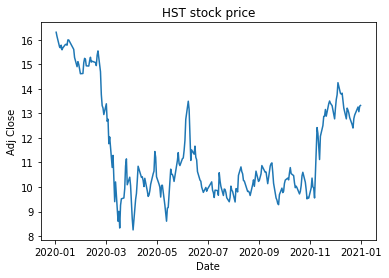

In [101]:
x = df[df['Symbol']=='HST']
x['Date'] = pd.to_datetime(x['Date'])
# filter date between 2020 and 2022
x = x[(x['Date'] >= '2020-01-01') & (x['Date'] <= '2021-01-01')]

plt.plot(x['Date'], x['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('HST stock price')


In [5]:
def plotIndividualStockInCovid(symbol):
    x = df[df['Symbol']==symbol]
    x['Date'] = pd.to_datetime(x['Date'])
    # filter date between 2020 and 2022
    x = x[(x['Date'] >= '2020-01-01') & (x['Date'] <= '2021-01-01')]

    plt.plot(x['Date'], x['Adj Close'])
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.title(f'{symbol} stock price')
    plt.show()

In [139]:
all_companies_df[all_companies_df['Industry'] == 'Semiconductors']

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,880.08,2200200019968,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.045444
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1339.43,620720029696,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012821
27,NMS,AMD,"Advanced Micro Devices, Inc.","Advanced Micro Devices, Inc.",Technology,Semiconductors,170.42,275422576640,3.854000e+09,0.102,Santa Clara,CA,United States,26000.0,"Advanced Micro Devices, Inc. operates as a sem...",0.005689
40,NMS,QCOM,QUALCOMM Incorporated,QUALCOMM Incorporated,Technology,Semiconductors,171.53,191427477504,1.085300e+10,0.050,San Diego,CA,United States,50000.0,QUALCOMM Incorporated engages in the developme...,0.003954
49,NMS,INTC,Intel Corporation,Intel Corporation,Technology,Semiconductors,38.71,164783423488,9.633000e+09,0.097,Santa Clara,CA,United States,124800.0,"Intel Corporation designs, develops, manufactu...",0.003404
56,NMS,TXN,Texas Instruments Incorporated,Texas Instruments Incorporated,Technology,Semiconductors,167.50,152434376704,8.490000e+09,-0.127,Dallas,TX,United States,34000.0,"Texas Instruments Incorporated designs, manufa...",0.003148
65,NMS,MU,"Micron Technology, Inc.","Micron Technology, Inc.",Technology,Semiconductors,123.58,136848785408,3.663000e+09,0.577,Boise,ID,United States,43000.0,"Micron Technology, Inc. designs, develops, man...",0.002827
98,NMS,ADI,"Analog Devices, Inc.","Analog Devices, Inc.",Technology,Semiconductors,194.76,96583041024,5.681084e+09,-0.227,Wilmington,MA,United States,26000.0,"Analog Devices, Inc. designs, manufactures, te...",0.001995
150,NMS,NXPI,NXP Semiconductors N.V.,NXP Semiconductors N.V.,Technology,Semiconductors,241.01,61809184768,4.832000e+09,0.033,Eindhoven,NaN,Netherlands,34200.0,NXP Semiconductors N.V. offers various semicon...,0.001277
192,NMS,MCHP,Microchip Technology Incorporat,Microchip Technology Incorporated,Technology,Semiconductors,87.57,47321776128,4.076700e+09,-0.186,Chandler,AZ,United States,22600.0,"Microchip Technology Incorporated develops, ma...",0.000977


C:\Users\HamadAlHammadi\AppData\Local\Temp\ipykernel_45796\1433119288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Date'] = pd.to_datetime(x['Date'])


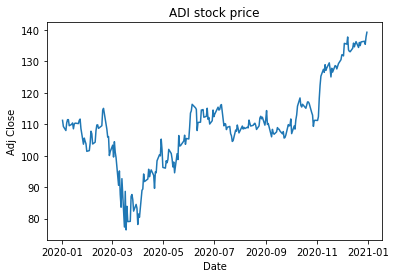

In [10]:
plotIndividualStockInCovid('ADI')


C:\Users\HamadAlHammadi\AppData\Local\Temp\ipykernel_22888\1433119288.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



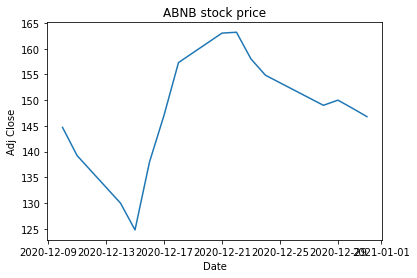

In [165]:
plotIndividualStockInCovid('ABNB')

In [6]:
time_df = df.copy().dropna()
time_df['Date'] = pd.to_datetime(time_df['Date'])

time_df = time_df[(time_df['Date'] >= '2020-01-01') & (time_df['Date'] <= '2022-01-01')]


# calculate pct change for each month

time_df['Month'] = time_df['Date'].dt.month
time_df['Year'] = time_df['Date'].dt.year


<AxesSubplot:xlabel='Year,Month'>

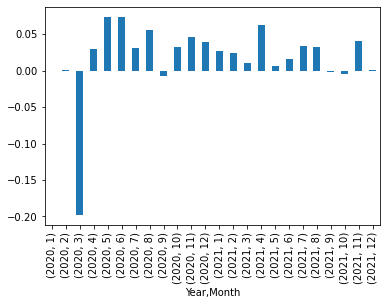

In [11]:
time_df.groupby(['Year', 'Month'])['Adj Close'].mean().pct_change().plot(kind='bar')
# is it inflation??

# ibrahim says money went from big companies to small companies. is it true? ibrahim says from teeze

In [22]:
time_df.groupby(['Symbol', 'Year', 'Month'])['Adj Close'].mean()['ZBRA'].pct_change()

Year  Month
2020  1             NaN
      2       -0.053295
      3       -0.201594
      4        0.067548
      5        0.178218
      6        0.098125
      7        0.021742
      8        0.055985
      9       -0.085271
      10       0.102832
      11       0.224281
      12       0.082899
2021  1        0.062722
      2        0.137891
      3        0.039820
      4        0.050550
      5       -0.025481
      6        0.048722
      7        0.054199
      8        0.060868
      9       -0.009899
      10      -0.086187
      11       0.150288
      12       0.000535
Name: Adj Close, dtype: float64

In [44]:
y

Symbol  Year  Month
A       2020  1             NaN
              2       -0.048400
              3       -0.136552
              4        0.059982
              5        0.073977
                         ...   
ZTS     2021  8        0.023040
              9       -0.003146
              10       0.001430
              11       0.080820
              12       0.067302
Name: Adj Close, Length: 11913, dtype: float64

In [55]:
y

Symbol  Year  Month
A       2020  1             NaN
              2       -0.048400
              3       -0.136552
              4        0.059982
              5        0.073977
                         ...   
ZTS     2021  8        0.023040
              9       -0.003146
              10       0.001430
              11       0.080820
              12       0.067302
Name: Adj Close, Length: 11913, dtype: float64

In [52]:
index = y.index
for (s, y, m) in index:
    print(y[(s, y, m)])

TypeError: 'int' object is not subscriptable

In [54]:
# let 2020, 1 be the minimum month for each symbol



y = time_df.groupby(['Symbol', 'Year', 'Month'])['Adj Close'].mean().pct_change()
# # get the minimum month for each symbol
# min_month = y.groupby('Symbol').apply(lambda x: x.abs().idxmax())
# # group by min_month
# y[min_month]

# unstack the dataframe
# for each symbol get the month with the highest pct change

# get AAPL
for i in range(1,12+1):
    print(y[('AAPL', 2020, i)])

3.3049544428417494
-0.00021177685381956746
-0.15643144329419967
0.037882739430866286
0.14037991219053048
0.11627793168291056
0.1054309152593147
0.22923364838351956
-0.018220739704647437
0.011187384407454815
0.004941700426327689
0.0899370539493467


In [14]:
y[min_month].reset_index()

,Symbol,Year,Month,Adj Close
0,A,2020,3,-0.136552
1,AAL,2020,1,-0.819499
2,AAPL,2020,1,3.304954
3,ABBV,2020,1,-0.576055
4,ABNB,2020,12,0.260031
...,...,...,...,...
492,XYL,2020,1,0.369343
493,YUM,2020,3,-0.257691
494,ZBH,2020,3,-0.321521
495,ZBRA,2020,1,1.112327


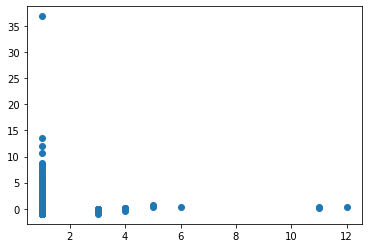

In [25]:
to_plot = y[min_month].reset_index()
plt.scatter(to_plot['Month'], to_plot['Adj Close'])
plt.show()

In [154]:
time_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Month,Year,pct_change
2516,2020-01-02,MMM,120.669189,150.501678,150.510040,148.110367,148.561874,4307633.0,1,2020,NaN
2517,2020-01-03,MMM,119.630058,149.205688,149.381271,146.847824,148.010040,2950412.0,1,2020,-0.008611
2518,2020-01-06,MMM,119.744034,149.347824,149.423080,147.449829,148.118729,2389608.0,1,2020,0.000953
2519,2020-01-07,MMM,119.261383,148.745819,149.255859,147.842804,149.063538,2598908.0,1,2020,-0.004031
2520,2020-01-08,MMM,121.091499,151.028427,151.755859,148.536789,148.829437,3298927.0,1,2020,0.015345
...,...,...,...,...,...,...,...,...,...,...,...
1804192,2021-12-27,ZTS,241.953705,246.509995,246.720001,243.080002,244.389999,807000.0,12,2021,0.016494
1804193,2021-12-28,ZTS,239.735474,244.250000,247.839996,243.639999,247.000000,1004400.0,12,2021,-0.009168
1804194,2021-12-29,ZTS,242.464081,247.029999,247.850006,243.639999,244.020004,939900.0,12,2021,0.011382
1804195,2021-12-30,ZTS,240.628662,245.160004,249.270004,244.960007,247.050003,859100.0,12,2021,-0.007570


In [167]:
print(1)

1


Transistor COmpanies

In [57]:
companies_df = pd.read_csv('sp500_companies.csv')

In [58]:
# filter semi conductor companies
companies_df = companies_df[companies_df['Industry'] == 'Semiconductors']

In [59]:
companies_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,880.08,2200200019968,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.045444
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1339.43,620720029696,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012821
27,NMS,AMD,"Advanced Micro Devices, Inc.","Advanced Micro Devices, Inc.",Technology,Semiconductors,170.42,275422576640,3.854000e+09,0.102,Santa Clara,CA,United States,26000.0,"Advanced Micro Devices, Inc. operates as a sem...",0.005689
40,NMS,QCOM,QUALCOMM Incorporated,QUALCOMM Incorporated,Technology,Semiconductors,171.53,191427477504,1.085300e+10,0.050,San Diego,CA,United States,50000.0,QUALCOMM Incorporated engages in the developme...,0.003954
49,NMS,INTC,Intel Corporation,Intel Corporation,Technology,Semiconductors,38.71,164783423488,9.633000e+09,0.097,Santa Clara,CA,United States,124800.0,"Intel Corporation designs, develops, manufactu...",0.003404
56,NMS,TXN,Texas Instruments Incorporated,Texas Instruments Incorporated,Technology,Semiconductors,167.50,152434376704,8.490000e+09,-0.127,Dallas,TX,United States,34000.0,"Texas Instruments Incorporated designs, manufa...",0.003148
65,NMS,MU,"Micron Technology, Inc.","Micron Technology, Inc.",Technology,Semiconductors,123.58,136848785408,3.663000e+09,0.577,Boise,ID,United States,43000.0,"Micron Technology, Inc. designs, develops, man...",0.002827
98,NMS,ADI,"Analog Devices, Inc.","Analog Devices, Inc.",Technology,Semiconductors,194.76,96583041024,5.681084e+09,-0.227,Wilmington,MA,United States,26000.0,"Analog Devices, Inc. designs, manufactures, te...",0.001995
150,NMS,NXPI,NXP Semiconductors N.V.,NXP Semiconductors N.V.,Technology,Semiconductors,241.01,61809184768,4.832000e+09,0.033,Eindhoven,NaN,Netherlands,34200.0,NXP Semiconductors N.V. offers various semicon...,0.001277
192,NMS,MCHP,Microchip Technology Incorporat,Microchip Technology Incorporated,Technology,Semiconductors,87.57,47321776128,4.076700e+09,-0.186,Chandler,AZ,United States,22600.0,"Microchip Technology Incorporated develops, ma...",0.000977


In [71]:
stocks_trans = df[df['Symbol'].isin(companies_df['Symbol'])]
stocks_trans['Date'] = pd.to_datetime(stocks_trans['Date'])
stocks_trans = stocks_trans[(stocks_trans['Date'] >= '2020-01-01') & (stocks_trans['Date'] <= '2021-12-31')]
stocks_trans['Month'] = stocks_trans['Date'].dt.month
stocks_trans['Year'] = stocks_trans['Date'].dt.year

C:\Users\HamadAlHammadi\AppData\Local\Temp\ipykernel_34820\772267804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_trans['Date'] = pd.to_datetime(stocks_trans['Date'])
C:\Users\HamadAlHammadi\AppData\Local\Temp\ipykernel_34820\772267804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_trans['Month'] = stocks_trans['Date'].dt.month
C:\Users\HamadAlHammadi\AppData\Local\Temp\ipykernel_34820\772267804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [79]:
pct_change_trans = stocks_trans.groupby(['Symbol', 'Year', 'Month'])['Adj Close'].mean().pct_change().reset_index()#.groupby(['Symbol', 'Month'])['Adj Close'].mean()

In [82]:
pct_change_trans['Adj Close'] = abs(pct_change_trans['Adj Close'])

In [88]:
abs_pct_change = pct_change_trans[pct_change_trans['Month'] != 1].reset_index(drop=True)

In [93]:
top3_abs = abs_pct_change.groupby('Symbol')['Adj Close'].nlargest(3)

In [114]:
pct_change_trans_no_january = stocks_trans.groupby(['Symbol', 'Year', 'Month'])['Adj Close'].mean().pct_change().reset_index()[stocks_trans.groupby(['Symbol', 'Year', 'Month'])['Adj Close'].mean().pct_change().reset_index()['Month'] != 1].reset_index(drop=True)
pd_arr = []
for symbol in top3_abs.index.levels[0]:
    cc = pct_change_trans_no_january.loc[top3_abs[symbol].index.to_list()]
    pd_arr.append(cc)

top3_df = pd.concat(pd_arr, ignore_index=True)

In [121]:
top3_df_2020['Month'].value_counts()

3     11
6      7
8      4
11     3
5      3
4      2
10     1
12     1
Name: Month, dtype: int64

In [123]:
top3_df_2020 = top3_df[top3_df['Year'] == 2020]
top3_df_2021 = top3_df[top3_df['Year'] == 2021]

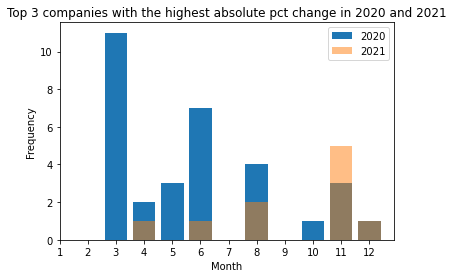

In [139]:
# plot histogram for 2020
value_count_2020 = top3_df_2020['Month'].value_counts()
value_count_2021 = top3_df_2021['Month'].value_counts()
plt.bar(value_count_2020.index, value_count_2020.values, label='2020')
plt.bar(value_count_2021.index, value_count_2021.values, alpha=0.5, label='2021')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend()
plt.title('Top 3 companies with the highest absolute pct change in 2020 and 2021')
plt.show()